Q1: Joining data and confirming the join is correct. 

Join the AirBnB listings data(listings.csv)from February 2021 with the neighborhoods geojson file. How many AirBnB listings were intheRoxburyneighborhoodin February 2021?

In [3]:
#importing the necessary packages to make everything work
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
import seaborn as sns

In [4]:
import os 
os.getcwd()
#changing the directory to the directory in which I'm working
os.chdir(r'C:\Users\caree\Box\1_HW (1)\1_HW\Data')

In [5]:
#reading in the csv file and creating a variable
listings21 = pd.read_csv(r"C:\Users\caree\Box\1_HW (1)\1_HW\Data\Boston_AirBnB_Feb2021\listings.csv")

#finding out info about the dataset
listings21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2959 non-null   int64  
 1   listing_url                                   2959 non-null   object 
 2   scrape_id                                     2959 non-null   int64  
 3   last_scraped                                  2959 non-null   object 
 4   name                                          2959 non-null   object 
 5   description                                   2928 non-null   object 
 6   neighborhood_overview                         2086 non-null   object 
 7   picture_url                                   2959 non-null   object 
 8   host_id                                       2959 non-null   int64  
 9   host_url                                      2959 non-null   o

In [6]:
#looiking at the first 2 rows in the dataset
listings21.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210219004231,2021-02-20,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.26
1,6695,https://www.airbnb.com/rooms/6695,20210219004231,2021-02-19,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,10.0,9.0,10.0,STR-404620,f,4,4,0,0,0.82


In [7]:
listings21.value_counts()

Series([], dtype: int64)

In [8]:
listings21.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.959000e+03,2.959000e+03,2.959000e+03,2959.000000,2959.000000,0.0,2959.000000,2959.000000,2959.000000,0.0,...,2058.000000,2056.000000,2059.000000,2057.000000,2057.000000,2959.000000,2959.000000,2959.000000,2959.000000,2073.000000
mean,2.869287e+07,2.021022e+13,1.090333e+08,148.920581,148.920581,NaN,42.337678,-71.082283,3.103751,NaN,...,9.480078,9.757782,9.694998,9.597472,9.283422,20.121325,16.228456,3.826293,0.005069,1.387631
std,1.482152e+07,0.000000e+00,1.163041e+08,398.661073,398.661073,NaN,0.026675,0.032916,2.119419,NaN,...,0.911676,0.732750,0.841253,0.764200,0.975319,33.703302,32.575234,8.323592,0.071030,1.876724
min,3.781000e+03,2.021022e+13,4.804000e+03,0.000000,0.000000,NaN,42.235200,-71.173440,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.631197e+07,2.021022e+13,1.617076e+07,1.000000,1.000000,NaN,42.320940,-71.102630,2.000000,NaN,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.230000
50%,3.039028e+07,2.021022e+13,4.860042e+07,5.000000,5.000000,NaN,42.344790,-71.072190,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,9.000000,5.000000,1.000000,0.000000,0.000000,0.780000
75%,4.246326e+07,2.021022e+13,1.990196e+08,30.000000,30.000000,NaN,42.355190,-71.060485,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,14.000000,3.000000,0.000000,1.990000
max,4.823128e+07,2.021022e+13,3.881499e+08,1515.000000,1515.000000,NaN,42.393720,-70.997010,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,134.000000,134.000000,42.000000,1.000000,26.850000


In [9]:
#looking at the unique listings in a column (neighbourhood_cleansed)
listings21["neighbourhood_cleansed"].unique()

array(['East Boston', 'Roxbury', 'Back Bay', 'North End', 'Beacon Hill',
       'Dorchester', 'South End', 'Jamaica Plain', 'Charlestown',
       'South Boston', 'Bay Village', 'Brighton', 'West Roxbury',
       'Roslindale', 'Downtown', 'Mission Hill', 'West End',
       'South Boston Waterfront', 'Fenway', 'Allston', 'Hyde Park',
       'Chinatown', 'Mattapan', 'Longwood Medical Area',
       'Leather District'], dtype=object)

In [10]:
#selecting Roxbury from that column
listings_rox = listings21[listings21["neighbourhood_cleansed"]=="Roxbury"]

In [11]:
#Asssuming that there are no N/A values and that each listing is associated with a price
listings_rox['price'].groupby(listings_rox['neighbourhood_cleansed']).agg(['count'])

,count
neighbourhood_cleansed,
Roxbury,223


In [12]:
listings_rox.shape

(223, 74)

In [13]:
import os 
print(os.getcwd())

C:\Users\caree\Box\1_HW (1)\1_HW\Data


In [14]:
os.listdir()

['Boston_AirBnB_Feb2020',
 'Boston_AirBnB_Feb2021',
 'Boston_Yelp',
 'list21.cpg',
 'list21.dbf',
 'list21.prj',
 'list21.shp',
 'list21.shx',
 'listings21.cpg',
 'listings21.dbf',
 'listings21.prj',
 'listings21.shp',
 'listings21.shx']

In [15]:
import geopandas as gpd
neighbourhoods = gpd.read_file(r'Boston_AirBnB_Feb2021\neighbourhoods.geojson')
neighbourhoods.head(2)

,neighbourhood,neighbourhood_group,geometry
0,Roslindale,None,"MULTIPOLYGON (((-71.12593 42.27200, -71.12575 ..."
1,Jamaica Plain,None,"MULTIPOLYGON (((-71.10499 42.32609, -71.10488 ..."


In [16]:
#checking the crs for the dataset
neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
#merging info from two columns 
listings21.merge(neighbourhoods,left_on='neighbourhood_cleansed', right_on='neighbourhood')

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_y,neighbourhood_group,geometry
0,3781,https://www.airbnb.com/rooms/3781,20210219004231,2021-02-20,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,NaN,f,1,1,0,0,0.26,East Boston,None,"MULTIPOLYGON (((-70.99546 42.39393, -70.99524 ..."
1,1042420,https://www.airbnb.com/rooms/1042420,20210219004231,2021-02-20,"Easy access to Airport, Downtown, Seaport. Fenway",First floor unit of a 2 family house. Lots of...,Location is in a mostly residential neighborho...,https://a0.muscache.com/pictures/17209353/29fe...,5715872,https://www.airbnb.com/users/show/5715872,...,STR-413220,f,1,1,0,0,0.93,East Boston,None,"MULTIPOLYGON (((-70.99546 42.39393, -70.99524 ..."
2,3965313,https://www.airbnb.com/rooms/3965313,20210219004231,2021-02-20,Minutes to Boston-Near Beach 69-1,3 or 5 minutes walking to Blue Line Orient Hei...,NaN,https://a0.muscache.com/pictures/e2b87059-47f7...,20551003,https://www.airbnb.com/users/show/20551003,...,NaN,f,1,0,1,0,1.89,East Boston,None,"MULTIPOLYGON (((-70.99546 42.39393, -70.99524 ..."
3,4315428,https://www.airbnb.com/rooms/4315428,20210219004231,2021-02-20,Master Suite@ Logan Airport,Gorgeous Room large windows with super view of...,quiet,https://a0.muscache.com/pictures/4e6eb2c0-3d0b...,22402141,https://www.airbnb.com/users/show/22402141,...,NaN,t,3,0,3,0,0.02,East Boston,None,"MULTIPOLYGON (((-70.99546 42.39393, -70.99524 ..."
4,4315439,https://www.airbnb.com/rooms/4315439,20210219004231,2021-02-20,Room Logan Airport + 1/2 bathroom,3 min walk to the T Blue Line Orient Heights 3...,Safe; no Crime; Great professional families,https://a0.muscache.com/pictures/8ab16e45-8bfc...,22402141,https://www.airbnb.com/users/show/22402141,...,NaN,t,3,0,3,0,0.08,East Boston,None,"MULTIPOLYGON (((-70.99546 42.39393, -70.99524 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,36002511,https://www.airbnb.com/rooms/36002511,20210219004231,2021-02-20,"The Inn at Longwood Medical, One King Size Bed",The Inn at Longwood Medical makes it easy to r...,NaN,https://a0.muscache.com/pictures/a28f7a3d-1014...,266754484,https://www.airbnb.com/users/show/266754484,...,Exempt: This listing is a hotel or motel,t,2,0,2,0,0.08,Longwood Medical Area,None,"MULTIPOLYGON (((-71.09811 42.33672, -71.09892 ..."
2955,13657486,https://www.airbnb.com/rooms/13657486,20210219004231,2021-02-19,"Large, modern 2br, 2ba renovated 6/16 with patio",6 mo. min. The fashionable Leather District o...,The building is located in the Leather Distric...,https://a0.muscache.com/pictures/f5253461-711c...,79348179,https://www.airbnb.com/users/show/79348179,...,NaN,t,1,1,0,0,0.07,Leather District,None,"MULTIPOLYGON (((-71.05838 42.34982, -71.05877 ..."
2956,35988307,https://www.airbnb.com/rooms/35988307,20210219004231,2021-02-19,Downtown Loft Boston - Ideal for Work/Live,"Spacious loft in Downtown Boston, Historic Dis...",A small enclave in the center of the city betw...,https://a0.muscache.com/pictures/miso/Hosting-...,105698174,https://www.airbnb.com/users/show/105698174,...,STR-413649,t,1,1,0,0,0.89,Leather District,None,"MULTIPOLYGON (((-71.05838 42.34982, -71.05877 ..."
2957,41785889,https://www.airbnb.com/rooms/41785889,20210219004231,2021-02-20,"Smart Downtown 1BR w/ W/D in unit, Gym, Doorma...",Show up and start living from day one in Bosto...,This furnished rental is located in the downto...,https://a0.muscache.com/pictures/373b573f-622c...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,t,134,134,0,0,NaN,Le

In [18]:
#changing longitude and latitude points to geometry
listings21 = gpd.GeoDataFrame(
    listings21, geometry=gpd.points_from_xy(listings21.longitude, listings21.latitude))
listings21.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,3781,https://www.airbnb.com/rooms/3781,20210219004231,2021-02-20,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,10.0,10.0,NaN,f,1,1,0,0,0.26,POINT (-71.02991 42.36413)
1,6695,https://www.airbnb.com/rooms/6695,20210219004231,2021-02-19,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,9.0,10.0,STR-404620,f,4,4,0,0,0.82,POINT (-71.09351 42.32994)


In [19]:
#setting the crs
listings21 = listings21.set_crs("EPSG:4326")

In [20]:
#checking the crs
listings21.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
#placing longitude and latitude into 2 columns 
listings21['lon'] = listings21.geometry.x
listings21['lat'] = listings21.geometry.y

#looking at the dataset to ensure that the columns have been added
listings21.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry,lon,lat
0,3781,https://www.airbnb.com/rooms/3781,20210219004231,2021-02-20,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,NaN,f,1,1,0,0,0.26,POINT (-71.02991 42.36413),-71.02991,42.36413
1,6695,https://www.airbnb.com/rooms/6695,20210219004231,2021-02-19,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,STR-404620,f,4,4,0,0,0.82,POINT (-71.09351 42.32994),-71.09351,42.32994
2,10813,https://www.airbnb.com/rooms/10813,20210219004231,2021-02-19,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,...,NaN,f,11,11,0,0,0.09,POINT (-71.08787 42.35061),-71.08787,42.35061
3,10986,https://www.airbnb.com/rooms/10986,20210219004231,2021-02-20,North End (Waterfront area) CLOSE TO MGH & SU...,Chic furnished studio apartment is located on ...,NaN,https://a0.muscache.com/pictures/46994/567b606...,38997,https://www.airbnb.com/users/show/38997,...,NaN,f,11,11,0,0,0.03,POINT (-71.05075 42.36352),-71.05075,42.36352
4,13247,https://www.airbnb.com/rooms/13247,20210219004231,2021-02-19,Back Bay studio apartment,Beautiful studio apartment in a great Back Bay...,The Back Bay has so many great shops & restaur...,https://a0.muscache.com/pictures/miso/Hosting-...,51637,https://www.airbnb.com/users/show/51637,...,NaN,f,2,2,0,0,NaN,POINT (-71.08752 42.35164),-71.08752,42.35164


In [44]:
#changing the csv file to a shapefile
listings21.to_file("list21.shp")

<ipython-input-44-3d2eb5584f91>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  listings21.to_file("list21.shp")


In [22]:
#grouping the price column by the neighbourhood
list_cnt=listings21['price'].groupby(listings21['neighbourhood_cleansed']).agg(['count', 'nunique'])

In [23]:
#checking to make sure that the aggregation worked
list_cnt.head()

,count,nunique
neighbourhood_cleansed,,
Allston,150,70
Back Bay,187,110
Bay Village,43,24
Beacon Hill,131,80
Brighton,210,98


In [24]:
#merging two datasets based on a similar column to create a new variable
list_new = list_cnt.merge(neighbourhoods,left_on='neighbourhood_cleansed', right_on='neighbourhood')

In [25]:
#checking the data type of the new variable
type(list_new)

pandas.core.frame.DataFrame

In [26]:
#creating a new variable that sets a crs for list_new
gdf = gpd.GeoDataFrame(list_new, crs="EPSG:4326")

In [63]:
gdf.plot

<AxesSubplot:>

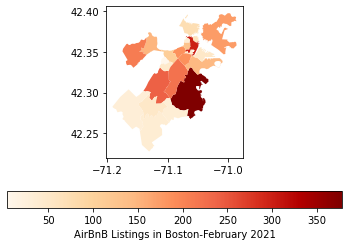

In [64]:
#plotting gdf (new variable for list_new)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
gdf.plot(column='count',
           ax=ax,
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "AirBnB Listings in Boston-February 2021", 'orientation': "horizontal"})

What projection are these data in? Is this a projected or geographic coordinate reference system (CRS)?
What's the difference between projection and crs?

In [27]:
#checking which projection the data are in 
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Q2: Vector area calculations. You may use the data from Q1 above for these questions.

Calculate the area within each neighborhood. Report which neighborhood has the highest area.


In [53]:
#assign the results to a variable or else it won't be saved. Setting a new crs for the one that was applied before, Changing it from the 'default' option to a more specific one  
gdf_crs = gdf.to_crs('epsg:26986') 
print(gdf_crs)

    count  nunique            neighbourhood neighbourhood_group  \
0     150       70                  Allston                None   
1     187      110                 Back Bay                None   
2      43       24              Bay Village                None   
3     131       80              Beacon Hill                None   
4     210       98                 Brighton                None   
5      75       51              Charlestown                None   
6      41       27                Chinatown                None   
7     378      133               Dorchester                None   
8     300      154                 Downtown                None   
9     176       96              East Boston                None   
10    108       70                   Fenway                None   
11     37       29                Hyde Park                None   
12    241      117            Jamaica Plain                None   
13      4        4         Leather District                Non

In [55]:
#adding an area column. Calculate the area of each neighbourhood
gdf_crs['area'] = gdf_crs.area
print(gdf_crs)

    count  nunique            neighbourhood neighbourhood_group  \
0     150       70                  Allston                None   
1     187      110                 Back Bay                None   
2      43       24              Bay Village                None   
3     131       80              Beacon Hill                None   
4     210       98                 Brighton                None   
5      75       51              Charlestown                None   
6      41       27                Chinatown                None   
7     378      133               Dorchester                None   
8     300      154                 Downtown                None   
9     176       96              East Boston                None   
10    108       70                   Fenway                None   
11     37       29                Hyde Park                None   
12    241      117            Jamaica Plain                None   
13      4        4         Leather District                Non

In [60]:
#sort the values based on area
gdf_sort = gdf_crs.sort_values('area',ascending=False)
print(gdf_sort)
#shows the highest value
gdf_sort.head(1)

    count  nunique            neighbourhood neighbourhood_group  \
7     378      133               Dorchester                None   
24     32       26             West Roxbury                None   
9     176       96              East Boston                None   
11     37       29                Hyde Park                None   
12    241      117            Jamaica Plain                None   
19    223       92                  Roxbury                None   
4     210       98                 Brighton                None   
18     51       26               Roslindale                None   
20    146       80             South Boston                None   
15     34       19                 Mattapan                None   
0     150       70                  Allston                None   
5      75       51              Charlestown                None   
21     51       40  South Boston Waterfront                None   
10    108       70                   Fenway                Non

,count,nunique,neighbourhood,neighbourhood_group,geometry,area
7,378,133,Dorchester,None,"MULTIPOLYGON (((236350.911 897678.360, 236420....",1.886993e+07


What units are these area estimates in? How do you know?

These numbers are very large so the may be in a small unit such as inches or feet

Add the area to the data frame you created when you joined the listings and neighborhoods data frame and provide a table of the first three observations.

In [61]:
#merging the two data sets based on their similar columns
list_area = list_new.merge(gdf_sort,left_on='neighbourhood', right_on='neighbourhood')
list_area.head(3)

,count_x,nunique_x,neighbourhood,neighbourhood_group_x,geometry_x,area_x,count_y,nunique_y,neighbourhood_group_y,geometry_y,area_y
0,150,70,Allston,None,"MULTIPOLYGON (((-71.13517 42.34601, -71.13823 ...",0.000442,150,70,None,"MULTIPOLYGON (((230060.806 899565.498, 229808....",4.040861e+06
1,187,110,Back Bay,None,"MULTIPOLYGON (((-71.07569 42.35691, -71.07579 ...",0.000177,187,110,None,"MULTIPOLYGON (((234956.230 900799.122, 234947....",1.615985e+06
2,43,24,Bay Village,None,"MULTIPOLYGON (((-71.06663 42.34877, -71.06739 ...",0.000012,43,24,None,"MULTIPOLYGON (((235707.123 899899.390, 235644....",1.074007e+05


Calculate the number of unique listings per area of neighborhood, and display it in a map. Title this map “Density of AirBnB listings in Boston MA”.

In [65]:
#calculate the number of unique listings per area of neighborhood. the numbers correlate to neighborhood names
gdf_crs['unique_listings'] = gdf_crs['nunique']/gdf_crs['area']
print(gdf_crs['unique_listings'])

0     0.000017
1     0.000068
2     0.000223
3     0.000099
4     0.000013
5     0.000014
6     0.000087
7     0.000007
8     0.000078
9     0.000008
10    0.000031
11    0.000002
12    0.000011
13    0.000063
14    0.000007
15    0.000003
16    0.000027
17    0.000095
18    0.000004
19    0.000011
20    0.000014
21    0.000016
22    0.000053
23    0.000086
24    0.000002
Name: unique_listings, dtype: float64


In [67]:
#set the crs and create a new variable to save it
gdf_plot = gpd.GeoDataFrame(gdf_crs['unique_listings'], crs="EPSG:26986")

<ipython-input-67-b421547a0135>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_plot = gpd.GeoDataFrame(gdf_crs['unique_listings'], crs="EPSG:4326")


<AxesSubplot:>

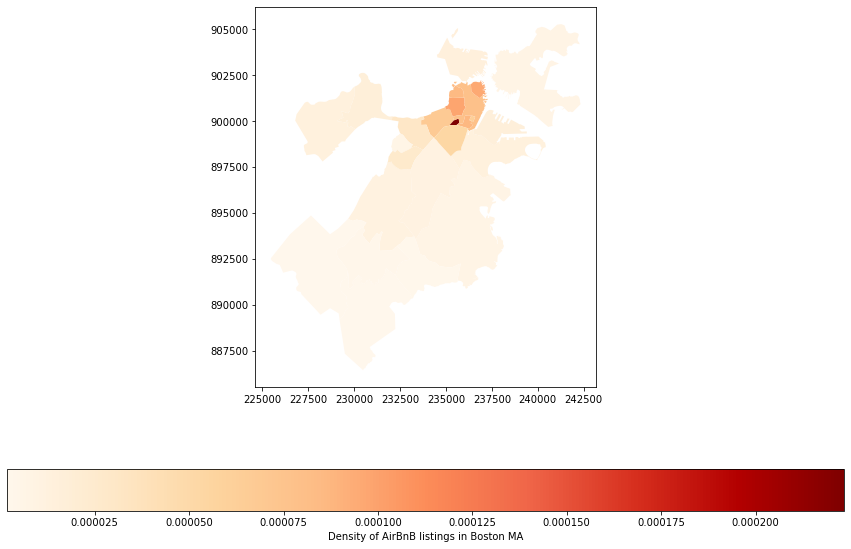

In [102]:
import matplotlib.pyplot as plt
gdf_crs.plot(column='unique_listings',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Density of AirBnB listings in Boston MA", 'orientation': "horizontal"})

Q3: Using X/Y coordinates to geocode features. 

Load the Yelp dataset (YELP.Restaurants.csv).

In [78]:
import geopandas as gpd
yelp_rest = pd.read_csv(r"C:\Users\caree\Box\1_HW (1)\1_HW\Data\Boston_Yelp\YELP.Restaurants.csv")
yelp_rest.head()

,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,...,reviews_Feb_20,reviews_Mar_20,reviews_Apr_20,reviews_May_20,reviews_Jun_20,reviews_Jul_20,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10
0,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,$$,37,34,0,1,...,0,0,1,1,0,0,0,Roslindale,1806741000,25025140400
1,100% Delicias Express,3,"660A Centre St,Jamaica Plain, MA 02130,","Dominican,Empanadas,",4.0,NaN,26,25,1,2,...,1,0,0,0,0,0,0,Jamaica Plain,1901410000,25025120400
2,107,4,"107 Salem St,Boston, MA 02113,","Restaurants,",NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Boston,302366000,25025030400
3,140 Supper Club,6,"138 St James Ave,Boston, MA 02116,","Diners,",5.0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,Boston,401087000,25025010600
4,163 Vietnamese Sandwiches & Bubble Tea,7,"66 Harrison Ave,Boston, MA 02111,","Vietnamese,Coffee & Tea,Delis,",3.5,$,335,335,0,0,...,1,1,0,0,2,0,1,Boston,305264000,25025070200


In [50]:
#finding info about the yelp dataset
yelp_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_name          2664 non-null   object 
 1   restaurant_ID            2664 non-null   int64  
 2   restaurant_address       2664 non-null   object 
 3   restaurant_tag           2662 non-null   object 
 4   rating                   2435 non-null   float64
 5   price                    1999 non-null   object 
 6   review_number            2664 non-null   int64  
 7   unique_reviewer          2664 non-null   int64  
 8   reviews_Jan_19           2664 non-null   int64  
 9   reviews_Feb_19           2664 non-null   int64  
 10  reviews_Mar_19           2664 non-null   int64  
 11  reviews_Apr_19           2664 non-null   int64  
 12  reviews_May_19           2664 non-null   int64  
 13  reviews_Jun_19           2664 non-null   int64  
 14  reviews_Jul_19          

 How many restaurants are in each neighborhood, according to just the CSV?

In [104]:
#group the total number of restaurants by the total number of neighbourhoods. In each neughbourhood, how many restaurants are there? 
yelp_cnt=yelp_rest['restaurant_ID'].groupby(yelp_rest['restaurant_neighborhood']).agg(['count', 'nunique'])
print(yelp_cnt)

                         count  nunique
restaurant_neighborhood                
Allston                    109      109
Boston                    1771     1771
Brighton                   109      109
Brookline                    4        4
Cambridge                    2        2
Charlestown                 41       41
Chestnut Hill                2        2
Dorchester                 174      174
Dorchester Center           61       61
East Boston                 14       14
Hudson                       1        1
Hyde Park                   34       34
Jamaica Plain               86       86
Mattapan                    42       42
North Waltham                1        1
Pembroke                     1        1
Roslindale                  57       57
Roxbury                     58       58
Roxbury Crossing            27       27
San Francisco                1        1
Somerville                   2        2
West Roxbury                51       51


Filter to only include those restaurants in Brookline (n =4). Use the Nominatim Geocoder to find the latitude and longitude of these restaurants. Hint: be sure to change the user agent string as we did in class to respect the terms of service, and use try except blocks to catch errors (e.g. a None value is returned).

In [108]:
#Filter to only include those restaurants in Brookline
rest_brook = yelp_rest[yelp_rest['restaurant_neighborhood']=='Brookline']

In [110]:
#Use the Nominatim Geocoder to find the latitude and longitude of these restaurants.
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

found_locations = []
lat = []
long = []

# Change this string!
geolocator = Nominatim(user_agent='kameice.francis@tufts.edu')
#replace with new variable
for address in rest_brook["restaurant_address"].iteritems():
    try:
        location = geolocator.geocode(address[1])
        print("The location is",location)
        found_locations.append(location)
        if location is not None:
            lat.append(location[1][0])
            long.append(location[1][1])
        else:
            lat.append(None)
            long.append(None)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%(my_address, e.message))


The location is Clear Flour Bakery, 178, Thorndike Street, Allston, Brookline, Suffolk County, Massachusetts, 02446, United States
The location is Gyu-Kaku, 1002, Beacon Street, Brookline, Norfolk County, Massachusetts, 02446, United States
The location is None
The location is 399, Chestnut Hill Avenue, Boston, Suffolk County, Massachusetts, 02445-5841, United States


In [111]:
#checking latitude and longitude values
print(lat)
print(long)

[42.3500233, 42.3463697, None, 42.3348214]
[-71.1261352, -71.1070249, None, -71.15020826199091]


In [112]:
#creating new columns and assigning the lat and long values to these columns
rest_brook['rest_brooklat']=lat
rest_brook['rest_brooklong']=long


<ipython-input-112-9bcc3c44ee9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_brook['rest_brooklat']=lat
<ipython-input-112-9bcc3c44ee9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_brook['rest_brooklong']=long


In [113]:
#checking to ensure that these new columns were added to the dataset(rest_brook)
rest_brook

,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,...,reviews_Apr_20,reviews_May_20,reviews_Jun_20,reviews_Jul_20,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10,rest_brooklat,rest_brooklong
2534,Clear Flour Bread,820,"178 Thorndike St,Brookline, MA 02446,","Bakeries,",4.5,$$,571,571,2,1,...,0,18,2,4,5,Brookline,2101583000,25025000703,42.350023,-71.126135
2560,Gyu-Kaku Japanese BBQ,1401,"1002 Beacon St,Brookline, MA 02446,","Japanese,Barbeque,Asian Fusion,",4.0,$$,773,766,18,7,...,0,1,3,3,0,Brookline,2100231000,25025010204,42.346370,-71.107025
2615,Renula's Greek Kitchen,2582,"Commonwealth Ave And St Marys St,Brookline, MA...","Greek,Food Trucks,",4.0,$,13,13,0,0,...,0,0,0,0,0,Brookline,2100105000,25025010204,NaN,NaN
2639,Sushi Momento,3022,"399 Chestnut Hill Ave,Brookline, MA 02445,","Sushi Bars,Cocktail Bars,Japanese,",4.5,$$,87,87,15,4,...,0,0,0,0,0,Brookline,2102428000,25025000502,42.334821,-71.150208


In [115]:
#adding a geometry column to the dataset
rest_brook = gpd.GeoDataFrame(
    rest_brook, geometry=gpd.points_from_xy(rest_brook.rest_brooklong, rest_brook.rest_brooklat))
rest_brook.head(2)

,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,...,reviews_May_20,reviews_Jun_20,reviews_Jul_20,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10,rest_brooklat,rest_brooklong,geometry
2534,Clear Flour Bread,820,"178 Thorndike St,Brookline, MA 02446,","Bakeries,",4.5,$$,571,571,2,1,...,18,2,4,5,Brookline,2101583000,25025000703,42.350023,-71.126135,POINT (-71.12614 42.35002)
2560,Gyu-Kaku Japanese BBQ,1401,"1002 Beacon St,Brookline, MA 02446,","Japanese,Barbeque,Asian Fusion,",4.0,$$,773,766,18,7,...,1,3,3,0,Brookline,2100231000,25025010204,42.346370,-71.107025,POINT (-71.10702 42.34637)


Plot the points for the restaurants as red points, overlaid with the results from Q2 showing the Density of AirBnB listings in Boston MA. 

In [116]:
#checking the crs for rest_brook
rest_brook.crs

In [117]:
#saw that rest_brook had no crs so setting the crs to the default one. Set to this one first and then change it after
rest_brook = rest_brook.set_crs("EPSG:4326")

<AxesSubplot:title={'center':'Restaurants in Brookline'}>

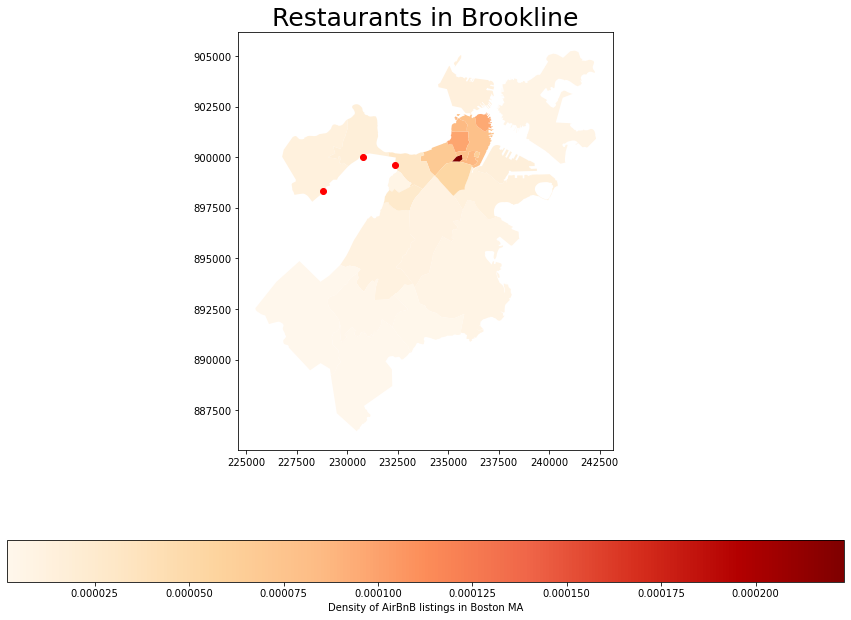

In [120]:
#ensuring that the crs for rest_brook is the same as the base(gdf_crs)
rest_brook = rest_brook.to_crs(gdf_crs.crs)

#plotting the map
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(15,11))
#base map
gdf_crs.plot(column='unique_listings',
           ax=ax,
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Density of AirBnB listings in Boston MA", 'orientation': "horizontal"})
ax.set_title('Restaurants in Brookline',fontdict={'fontsize':'25','fontweight':'3'})
#map which will be overlaid
rest_brook.plot(ax=ax, 
               color='red'
               )

Q4: Spatial joins and intersections

Perform a spatial join to match those restaurants geocoded in Question 3 within our neighborhood boundaries. 

In [121]:
#checking to ensure that the crs' are the same. if they weren't the same, would have to change them to be the same thing
gdf_crs.crs == rest_brook.crs

True

In [122]:
#spatially joining gdf_crs and rest_brook
brook_only = gpd.sjoin(gdf_crs, rest_brook, how='inner', op='contains', lsuffix='left', rsuffix='right')
brook_only.head(2)

,count,nunique,neighbourhood,neighbourhood_group,geometry,area,unique_listings,index_right,restaurant_name,restaurant_ID,...,reviews_Apr_20,reviews_May_20,reviews_Jun_20,reviews_Jul_20,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10,rest_brooklat,rest_brooklong
4,210,98,Brighton,None,"MULTIPOLYGON (((230060.806 899565.498, 230052....",7.447832e+06,0.000013,2639,Sushi Momento,3022,...,0,0,0,0,0,Brookline,2102428000,25025000502,42.334821,-71.150208


In [123]:
brook_only.shape

(1, 37)

How many restaurants are matched with an inner spatial join looking for those restaurants in Brighton contained within the neighborhood boundaries? 

There was only one. A restaurant was actually in Brighton but it was listed as if it was in Brookline. 